In [14]:
import os 
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import json

In [10]:
f = open("./logs/medical_ssd_resnet50.log")
lines = f.readlines()
f.close()

In [21]:
temp_log_dicts=[]
for i,line in enumerate(lines):
    try:
        curr_dict = json.loads(line)
        temp_log_dicts.append(curr_dict)
    except:
        print(line + ' is on line: ' + str(i))

77}
 is on line: 22056
62}
 is on line: 24535
8805}
 is on line: 24600
802}
 is on line: 24639
4}
 is on line: 24645
73}
 is on line: 24909
1}
 is on line: 25217
8}
 is on line: 25565
14}
 is on line: 25595

 is on line: 25734
{"type": "train", "session": 32, "data": {"loss": {"B": 1.9801, "M": 1.64212, "C": 1.67871, "S": 0.04905, "T": 5.34999}, "epoch": 0, "iter": 466, "lr": 0.0009388, "elapsed": 0.3775656223297119}, "time": 1700349475.78624{"type": "train", "session": 30, "data": {"loss": {"B": 1.85592, "M": 1.13194, "C": 1.72716, "S": 0.0407, "T": 4.75572}, "epoch": 0, "iter": 932, "lr": 0.001, "elapsed": 0.356581449508667}, "time": 1700349475.8054795}
 is on line: 25811

 is on line: 26019

 is on line: 26273
4}
 is on line: 26370

 is on line: 26463
}
 is on line: 26493
5}
 is on line: 26632
}
 is on line: 26676

 is on line: 26943
}
 is on line: 27335

 is on line: 27379
}
 is on line: 27611

 is on line: 27621
195}
 is on line: 27899

 is on line: 27986
}
 is on line: 28294

 is

In [22]:
#check that log lines are inside
print(len(temp_log_dicts))

39156


In [24]:
#create pandas dataframes from log file
session = 32
log_dicts = []
for i,log_dict in enumerate(temp_log_dicts):
    if log_dict['session'] == session:
        log_dicts.append(log_dict)


In [28]:
print(len(log_dicts))
print(log_dicts[1])

5809
{'type': 'train', 'session': 32, 'data': {'loss': {'B': 5.80536, 'M': 6.89333, 'C': 12.86959, 'S': 2.11205, 'T': 27.68033}, 'epoch': 0, 'iter': 0, 'lr': 0.0001, 'elapsed': 13.049551248550415}, 'time': 1700348998.2941327}


In [37]:
# initialize dataframes and fill them, im sure theres a better way for this but whatever
# Loss Key:
        #  - B: Box Localization Loss
        #  - C: Class Confidence Loss
        #  - M: Mask Loss
        #  - P: Prototype Loss
        #  - D: Coefficient Diversity Loss
        #  - E: Class Existence Loss
        #  - S: Semantic Segmentation Loss
train_dict = {}
train_dict['epoch'] = []
train_dict['iter'] = []
train_dict['total_loss'] = []
train_dict['bbox_loss'] = []
train_dict['mask_loss'] = [] 
val_dict = {}
val_dict['epoch'] = []
val_dict['iter'] = []
val_dict['total_loss'] = []
val_dict['bbox_loss'] = []
val_dict['mask_loss'] = []

for log_dict in log_dicts:
    if log_dict['type'] in ["train"]:
        train_dict['epoch'].append(log_dict['data']['epoch'])
        train_dict['iter'].append(log_dict['data']['iter'])
        train_dict['total_loss'].append(log_dict['data']['loss']['T'])
        train_dict['bbox_loss'].append(log_dict['data']['loss']['B'])
        train_dict['mask_loss'].append(log_dict['data']['loss']['M'])
    elif log_dict['type'] in ['val']:
        val_dict['epoch'].append(log_dict['data']['epoch'])
        val_dict['iter'].append(log_dict['data']['iter'])
        val_dict['total_loss'].append(log_dict['data']['loss']['T'])
        val_dict['bbox_loss'].append(log_dict['data']['loss']['B'])
        val_dict['mask_loss'].append(log_dict['data']['loss']['M'])

train_pd = pd.DataFrame.from_dict(train_dict)
val_pd = pd.DataFrame.from_dict(val_dict)
print(train_pd)

      epoch  iter  total_loss  bbox_loss  mask_loss
0         0     0    27.68033    5.80536    6.89333
1         0     1    26.64136    7.03973    5.45904
2         0     2    20.06063    4.94819    5.04523
3         0     3    19.09719    5.69435    4.46758
4         0     4    18.55231    5.46264    4.18335
...     ...   ...         ...        ...        ...
5803      0  5902     3.15817    1.25748    0.66430
5804      0  5903     1.93387    0.49332    0.73464
5805      0  5904     2.46166    0.64167    1.14403
5806      0  5905     1.74567    0.61421    0.67141
5807      0  5906     1.85624    0.64144    0.82951

[5808 rows x 5 columns]


In [43]:
print(val_pd)

Empty DataFrame
Columns: [epoch, iter, total_loss, bbox_loss, mask_loss]
Index: []


In [39]:
loss_array = train_pd['total_loss'].to_numpy()
iterations_array = train_pd['iter'].to_numpy()
print(len(loss_array))
print(len(iterations_array))

5808
5808


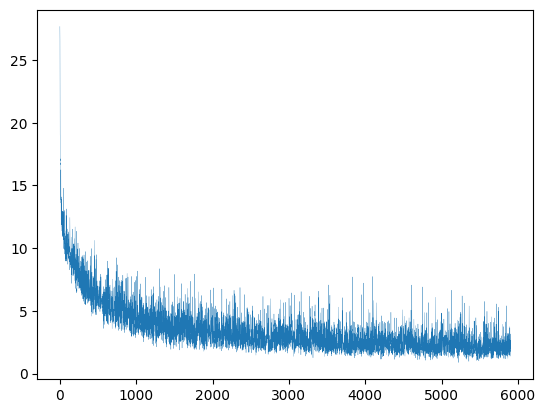

In [42]:
fig, ax = plt.subplots()
ax.plot(iterations_array, loss_array, linewidth=0.2)
plt.show()